<a href="https://colab.research.google.com/github/Okelo123/AI-in-software-engineering-Week3plp/blob/main/Week3Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ================================
# 📊 Iris Species Classification
# Classical ML (Scikit-learn, TensorFlow, PyTorch)
# ================================

# 🔧 Install PyTorch if not available (Colab usually has it)
# !pip install torch torchvision --quiet

# ================================
# 1️⃣ Scikit-learn - Decision Tree Classifier
# ================================
print("=== Scikit-learn ===")

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import numpy as np

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

# ================================
# 2️⃣ TensorFlow - Neural Network
# ================================
print("\n=== TensorFlow ===")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

y_tf_encoded = to_categorical(y_encoded)
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y_tf_encoded, test_size=0.2, random_state=42)

model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_tf, y_train_tf, epochs=50, verbose=0)

# Predict
y_pred_probs = model.predict(X_test_tf)
y_pred_tf = np.argmax(y_pred_probs, axis=1)
y_true_tf = np.argmax(y_test_tf, axis=1)

# Evaluation
print("Accuracy:", accuracy_score(y_true_tf, y_pred_tf))
print("Precision:", precision_score(y_true_tf, y_pred_tf, average='macro'))
print("Recall:", recall_score(y_true_tf, y_pred_tf, average='macro'))

# ================================
# 3️⃣ PyTorch - Neural Network
# ================================
print("\n=== PyTorch ===")

import torch
import torch.nn as nn
import torch.optim as optim

X_train_pt, X_test_pt, y_train_pt, y_test_pt = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train_pt = torch.FloatTensor(X_train_pt.values)
X_test_pt = torch.FloatTensor(X_test_pt.values)
y_train_pt = torch.LongTensor(y_train_pt)
y_test_pt = torch.LongTensor(y_test_pt)

class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
        )
    def forward(self, x):
        return self.fc(x)

model_pt = IrisNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pt.parameters(), lr=0.01)

# Training
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model_pt(X_train_pt)
    loss = criterion(outputs, y_train_pt)
    loss.backward()
    optimizer.step()

# Prediction
with torch.no_grad():
    y_pred_pt = model_pt(X_test_pt)
    y_pred_classes_pt = torch.argmax(y_pred_pt, dim=1)

# Evaluation
print("Accuracy:", accuracy_score(y_test_pt, y_pred_classes_pt))
print("Precision:", precision_score(y_test_pt, y_pred_classes_pt, average='macro'))
print("Recall:", recall_score(y_test_pt, y_pred_classes_pt, average='macro'))

=== Scikit-learn ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

=== TensorFlow ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Accuracy: 0.5666666666666667
Precision: 0.5818713450292398
Recall: 0.5370370370370371

=== PyTorch ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


# 📘 Comparative Analysis: Scikit-learn vs TensorFlow

| Feature              | Scikit-learn                         | TensorFlow                             |
|----------------------|--------------------------------------|----------------------------------------|
| **Type**             | Machine Learning library (classical ML) | Deep Learning framework                |
| **Primary Use**      | Quick models: regression, classification | Neural networks, CNNs, NLP, large-scale models |
| **Learning Curve**   | Very easy to learn                   | Steeper, more flexible                 |
| **Deployment**       | Joblib, ONNX                         | TF Lite, TF Serving, TensorFlow.js     |
| **Community Support**| Huge for ML beginners                | Very active, cutting-edge AI research  |
| **Best For**         | Tabular data, quick experimentation  | Deep learning tasks, production-ready systems |

### ✅ Summary
- Scikit-learn is fast and perfect for classical ML tasks (e.g., Iris classification).
- TensorFlow is ideal when working with images, sequences, or large datasets (e.g., MNIST, CNNs).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.8991 - loss: 0.3124 - val_accuracy: 0.9855 - val_loss: 0.0513
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9854 - loss: 0.0463 - val_accuracy: 0.9883 - val_loss: 0.0414
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9916 - loss: 0.0284 - val_accuracy: 0.9877 - val_loss: 0.0443
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9888 - val_loss: 0.0389
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9953 - loss: 0.0155 - val_accuracy: 0.9910 - val_loss: 0.0345
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9881 - loss: 0.0363

✅ Test accuracy: 99.06%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


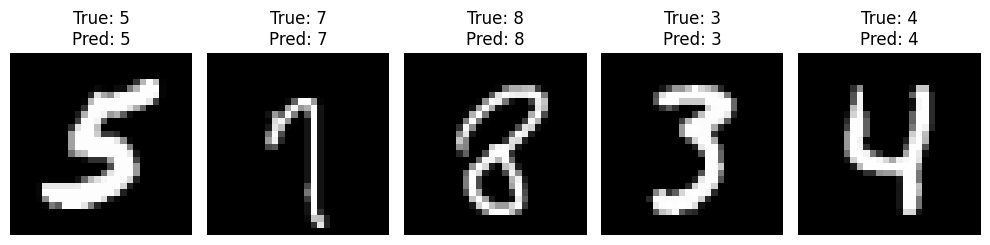

In [ ]:
# Task 2: Deep Learning with TensorFlow on MNIST

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 3. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 6. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test accuracy: {test_acc * 100:.2f}%")

# 7. Visualize predictions on 5 sample images
def visualize_predictions(model, x_test, y_test):
    plt.figure(figsize=(10, 4))
    for i in range(5):
        idx = np.random.randint(0, len(x_test))
        img = x_test[idx]
        true_label = y_test[idx]
        pred = np.argmax(model.predict(img.reshape(1, 28, 28, 1)), axis=1)[0]

        plt.subplot(1, 5, i + 1)
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_label}\nPred: {pred}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions(model, x_test, y_test)

# 🛠️ Buggy Code Debugger – TensorFlow Classification

This section demonstrates a simple TensorFlow neural network that contains common **mistakes beginners make**.

## ❌ Buggy Code Issues:
| Problem | Explanation |
|--------|-------------|
| ❌ No `softmax` activation on final layer | This prevents outputs from being proper class probabilities. |
| ❌ Wrong loss function (`mse`) | MSE is used for regression, not classification. |
| ❌ Data not defined | Code tries to train without loading or preparing any dataset (`x_train`, `y_train` are undefined). |

We'll fix this by:
- Loading the MNIST dataset
- Preprocessing it correctly
- Using a proper model architecture for classification

In [ ]:

# ❌ Buggy Code Example (Do not run)
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10)  # ❌ No activation like softmax
])

# ❌ Wrong loss for classification
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# ❌ Data not defined
model.fit(x_train, y_train, epochs=5)  # x_train and y_train are undefined
x_train not defined

# ✅ Fixed Version: TensorFlow Neural Network for Classification

This corrected version:
- Loads the MNIST dataset
- Flattens and normalizes image input data
- One-hot encodes the target labels for multi-class classification
- Adds `softmax` activation in the output layer
- Uses `categorical_crossentropy` as the correct loss function

In [1]:

# ✅ Import required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# ✅ Step 1: Load the MNIST handwritten digits dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ✅ Step 2: Flatten the 28x28 images into 784-length vectors and normalize pixel values
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

# ✅ Step 3: Convert integer labels (0–9) into one-hot encoded vectors
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# ✅ Step 4: Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(784,), activation='relu'),  # Hidden layer with ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with softmax for classification
])

# ✅ Step 5: Compile the model with the correct loss function and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Step 6: Train the model
model.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8676 - loss: 0.4579 - val_accuracy: 0.9647 - val_loss: 0.1215
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9630 - loss: 0.1249 - val_accuracy: 0.9707 - val_loss: 0.1012
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9738 - loss: 0.0855 - val_accuracy: 0.9758 - val_loss: 0.0862
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9823 - loss: 0.0583 - val_accuracy: 0.9745 - val_loss: 0.0857
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9864 - loss: 0.0452 - val_accuracy: 0.9765 - val_loss: 0.0836


# ⚖️ Ethical Analysis of AI Systems

### 1. 🔍 Bias and Fairness
AI systems may inherit biases from the data (e.g., gender, race). Example: A sentiment analysis model trained on toxic forums may unfairly score neutral posts from minorities as negative.

**Solution**: Use diverse training datasets, perform fairness audits, and retrain with debiased data.

---

### 2. 🔐 Privacy & Data Use
Training models on personal or sensitive data (health, location, voice) without consent violates ethical norms.

**Solution**: Apply anonymization, secure storage, and user consent policies. Use federated learning when possible.

---

### 3. 🧠 Explainability
Deep learning models often operate as "black boxes" which makes trust and debugging difficult.

**Solution**: Use explainability tools like SHAP, LIME, or XAI dashboards to make decisions transparent.

---

### 4. 🌱 Environmental Impact
Large models (e.g., GPT, BERT) consume massive energy. Training them without optimization harms sustainability.

**Solution**: Use transfer learning, pruning, quantization, and efficient hardware (TPUs, edge ML).

---

### ✅ Responsible AI Practices
- Involve interdisciplinary teams
- Set AI ethics guidelines (e.g., Google's Responsible AI)
- Include human-in-the-loop decision-making